Dataset Shape: (891, 15)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

First 5 rows:
   survived 

<ipython-input-1-e8a889086b29>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-1-e8a889086b29>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

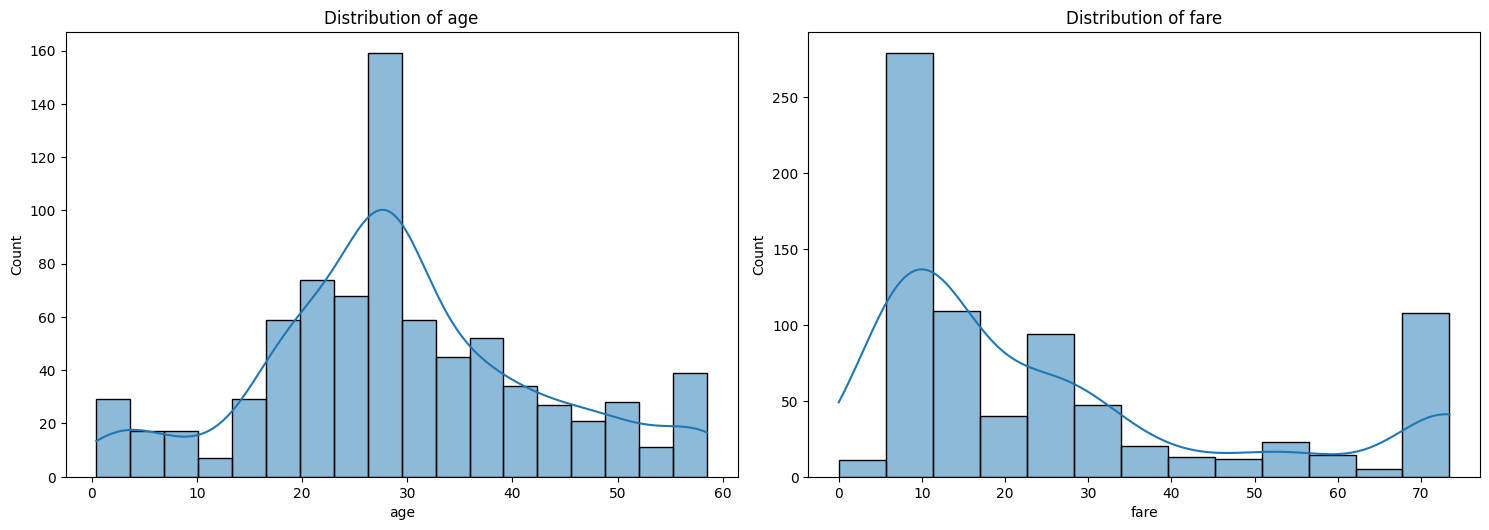

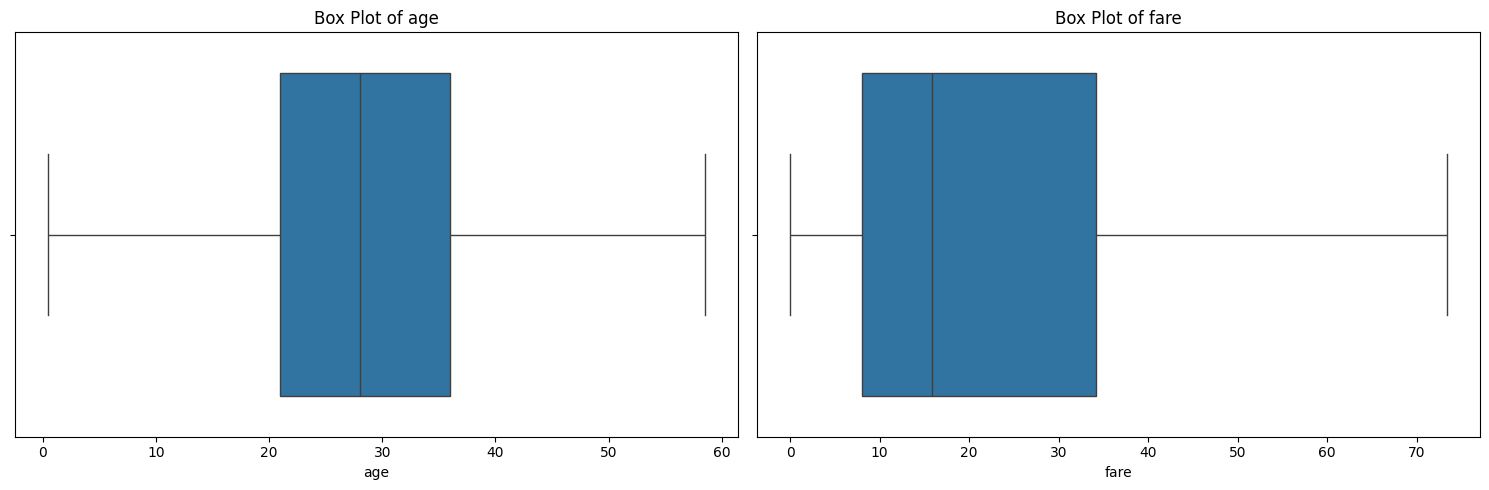

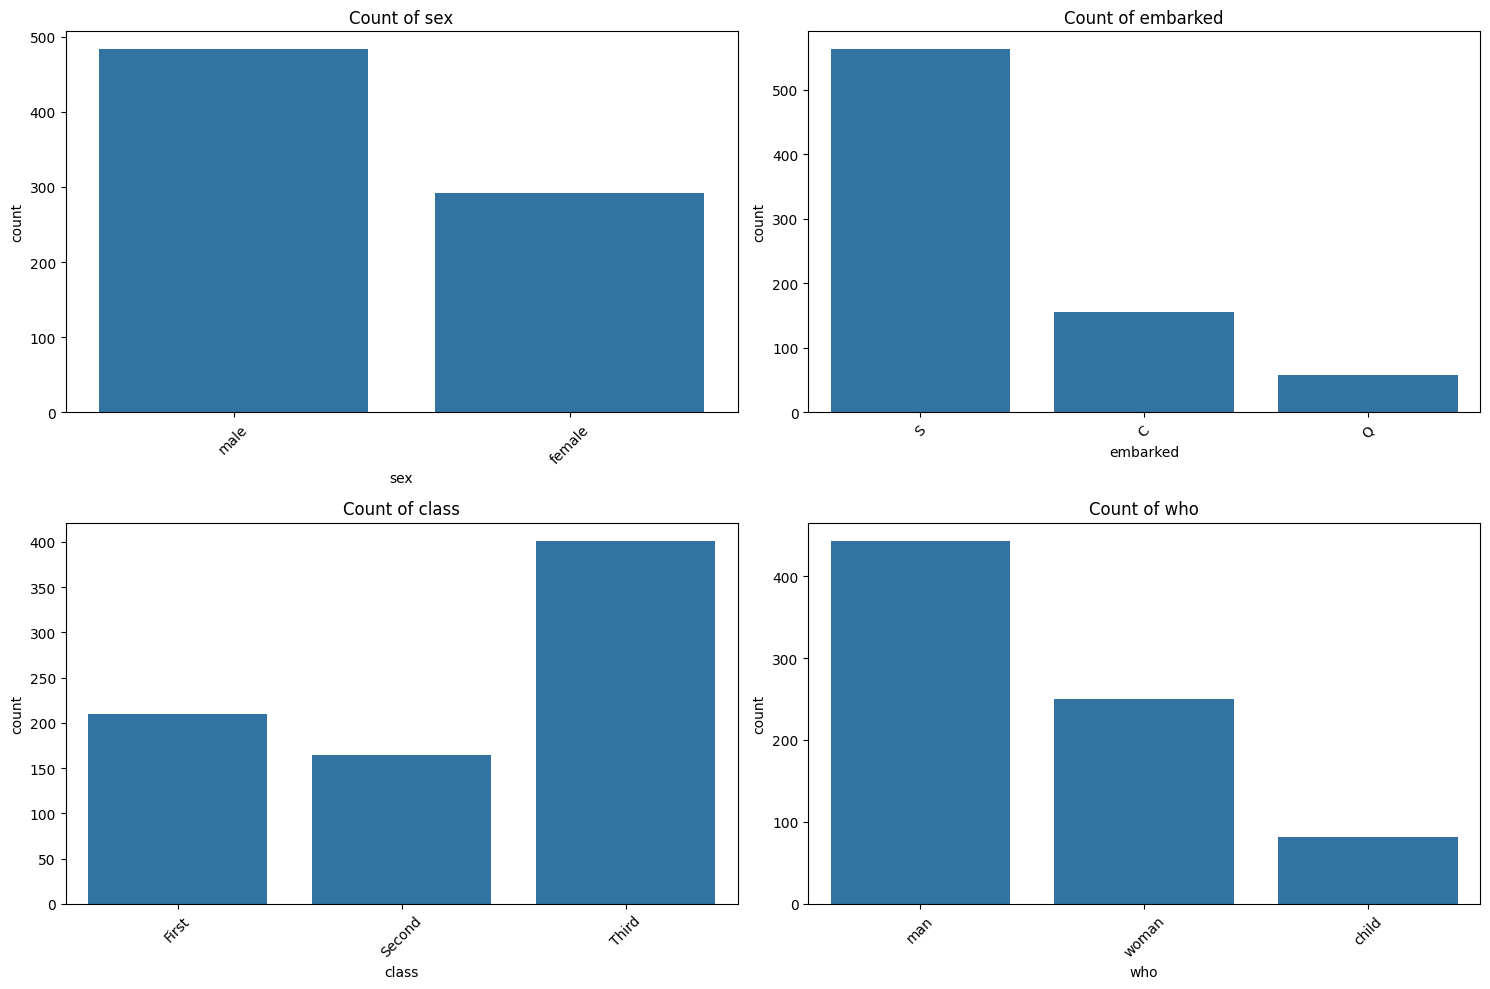

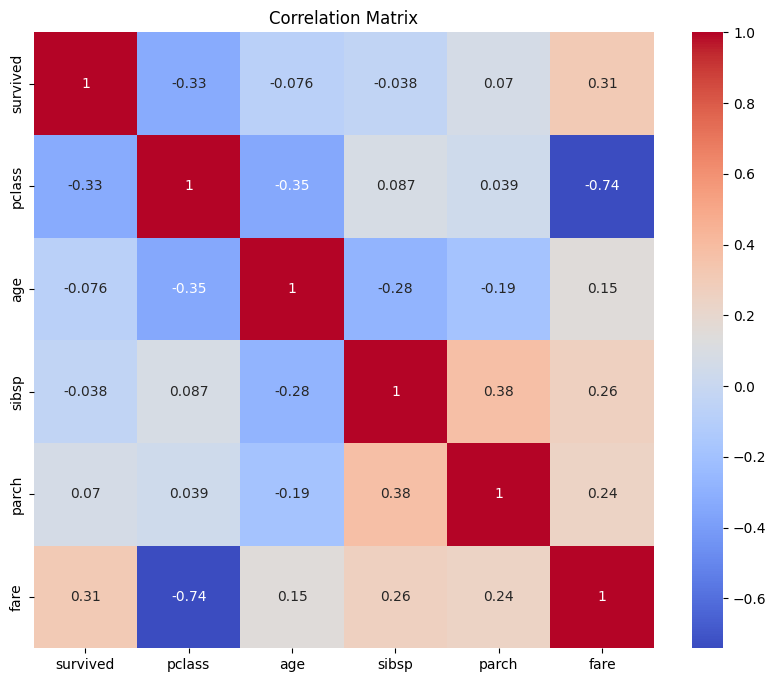

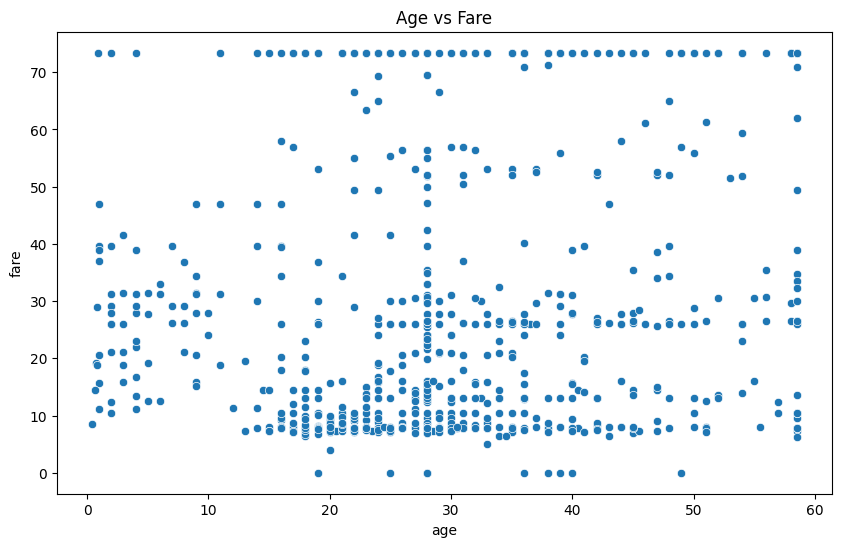

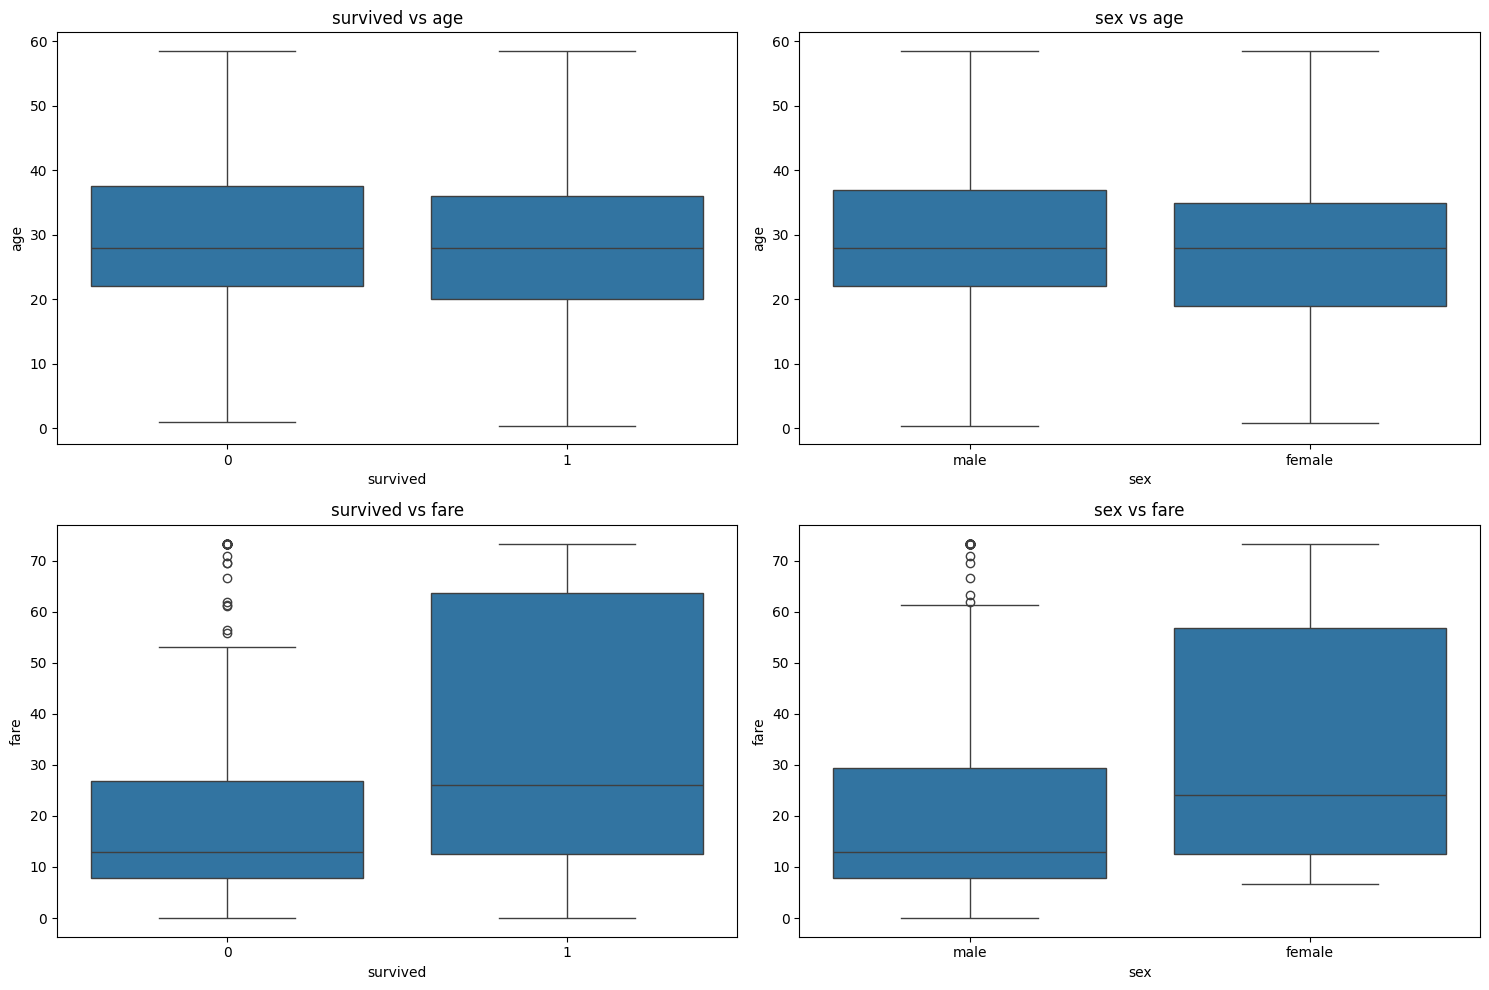

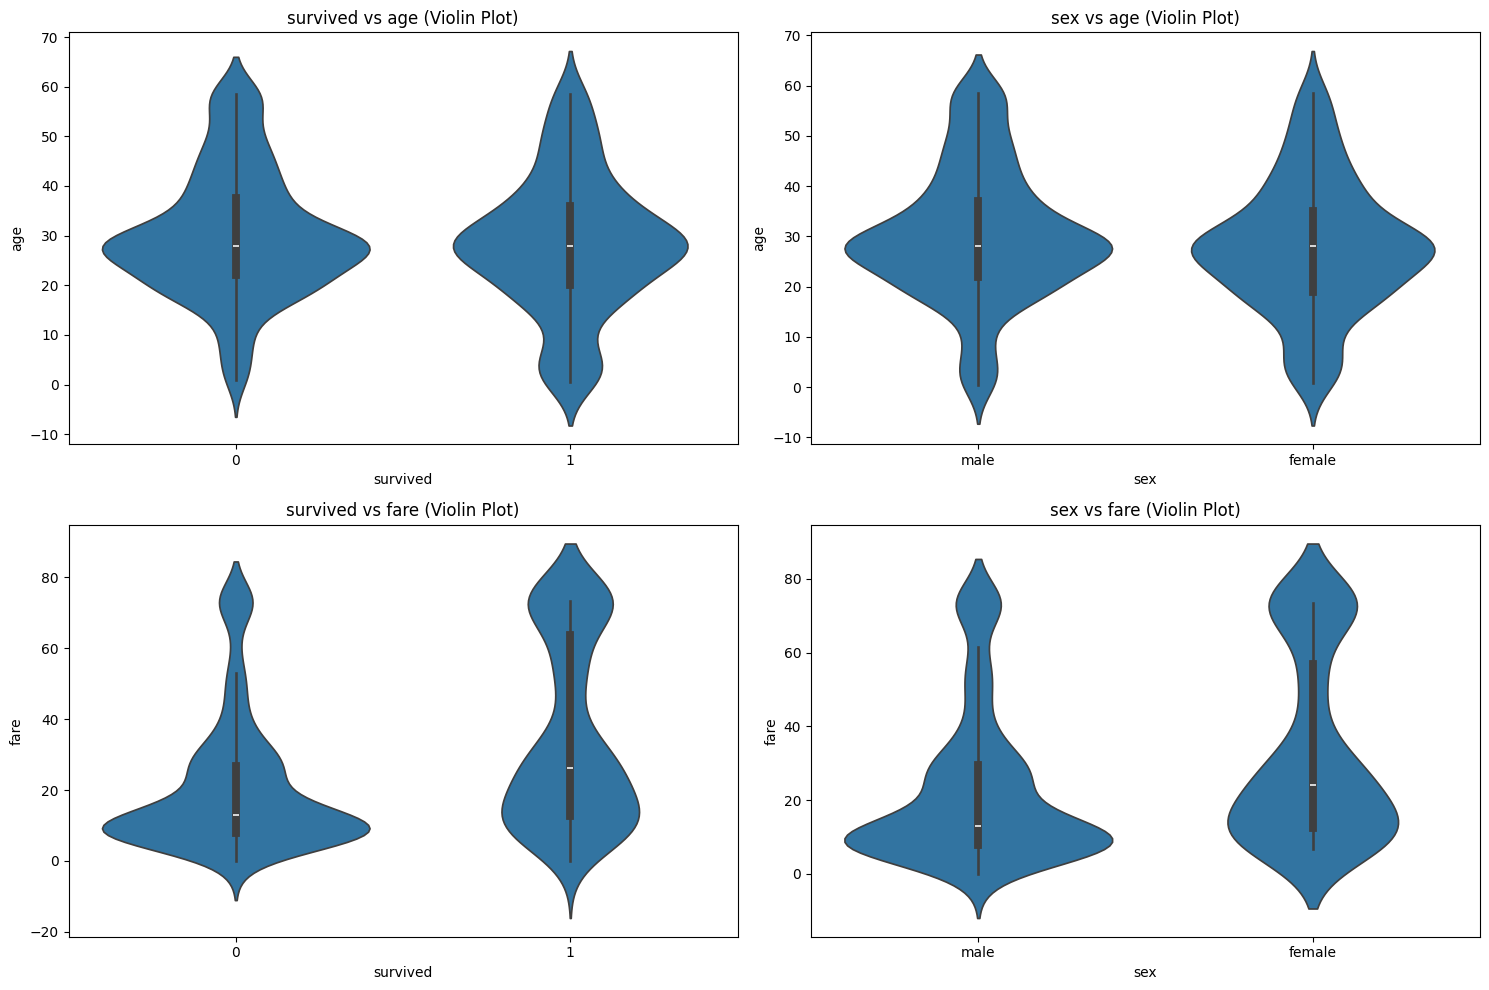

<Figure size 1200x1000 with 0 Axes>

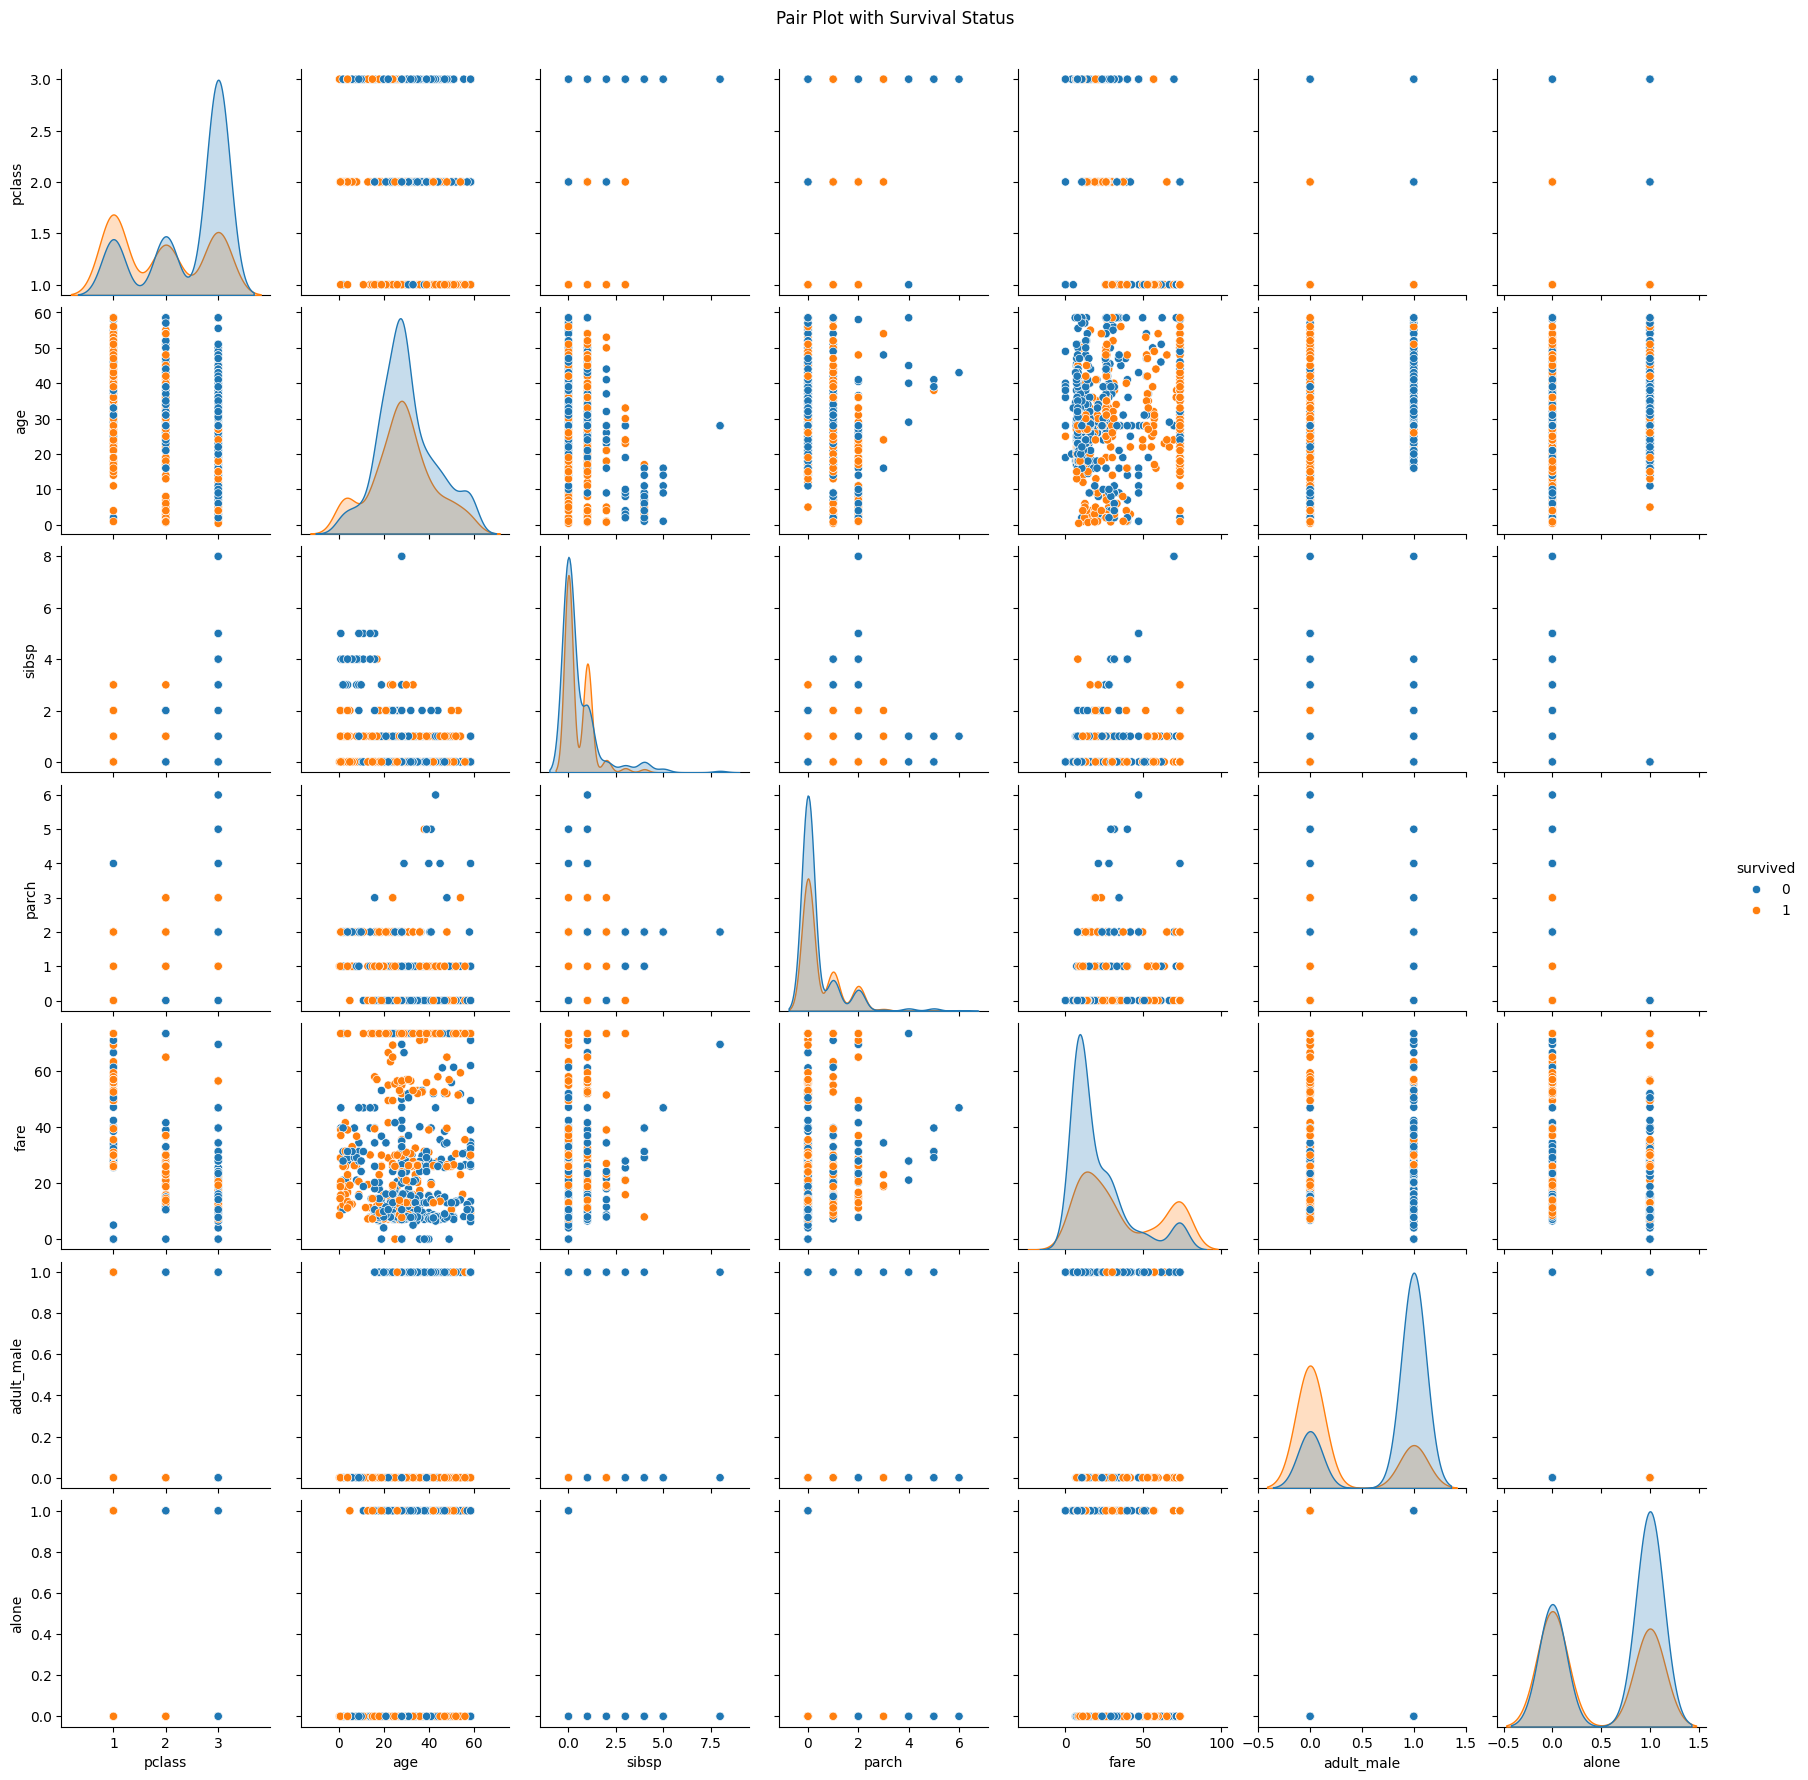

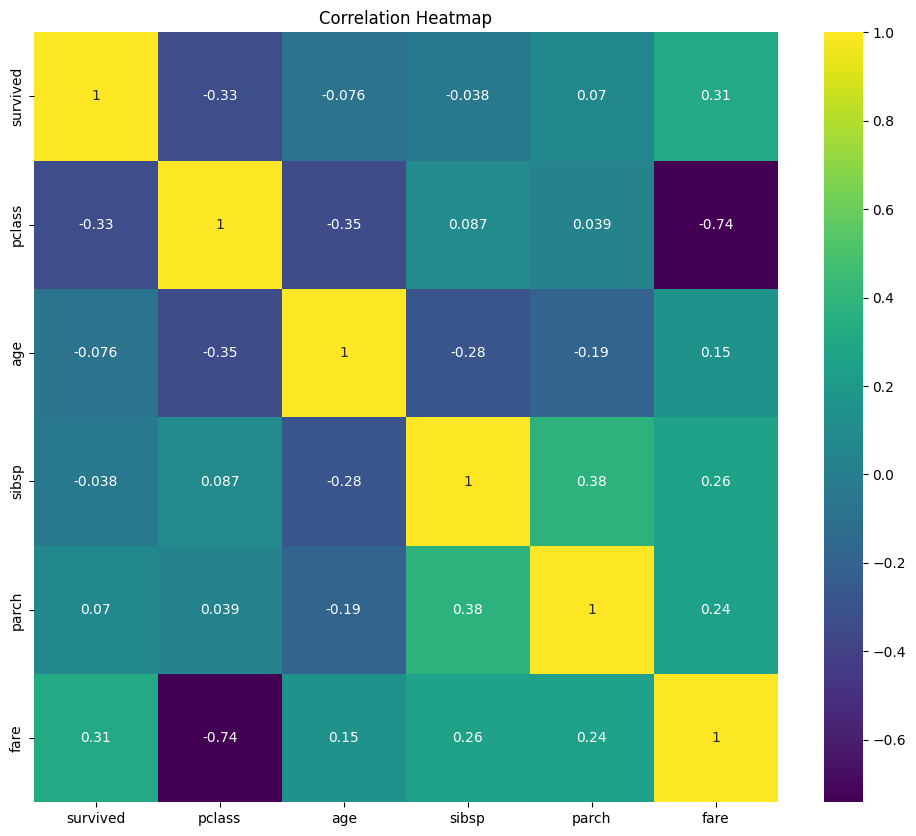

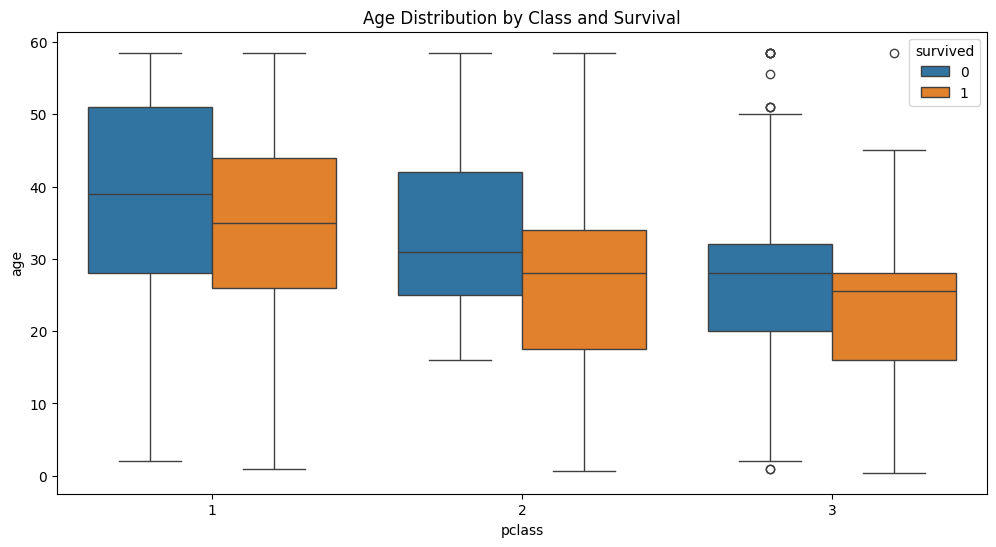

<Figure size 1200x600 with 0 Axes>

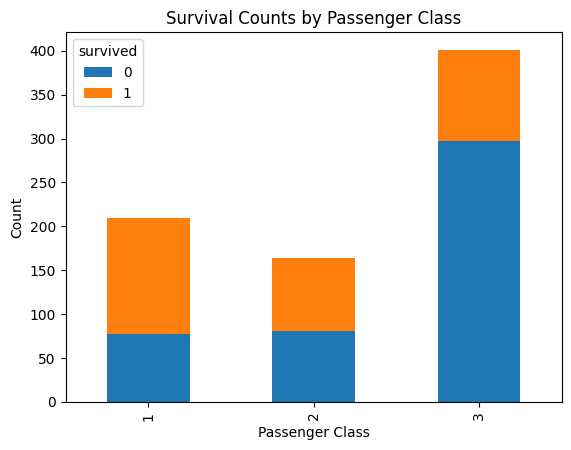

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = sns.load_dataset('titanic')

print("Dataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

if df['deck'].isnull().sum() / len(df) > 0.5:
    df.drop('deck', axis=1, inplace=True)

df.drop_duplicates(inplace=True)

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nOutliers in {column}: {len(outliers)}")

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

numerical_cols = ['age', 'fare']
for col in numerical_cols:
    df = handle_outliers(df, col)

df['sex'] = df['sex'].str.lower()

print("\nSummary Statistics:")
print(df.describe())

print("\nSkewness:")
print(df.select_dtypes(include=[np.number]).skew())
print("\nKurtosis:")
print(df.select_dtypes(include=[np.number]).kurtosis())

for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nFrequency distribution for {column}:")
    print(df[column].value_counts())
    print(f"Percentage distribution for {column}:")
    print(df[column].value_counts(normalize=True) * 100)

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.savefig('numerical_distributions.png')

plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.savefig('numerical_boxplots.png')

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=column, data=df)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_counts.png')

plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Age vs Fare')
plt.savefig('age_vs_fare.png')

plt.figure(figsize=(15, 10))
for i, num_col in enumerate(numerical_cols):
    for j, cat_col in enumerate(['survived', 'sex']):
        plt.subplot(2, 2, i*2+j+1)
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{cat_col} vs {num_col}')
plt.tight_layout()
plt.savefig('categorical_vs_numerical.png')

plt.figure(figsize=(15, 10))
for i, num_col in enumerate(numerical_cols):
    for j, cat_col in enumerate(['survived', 'sex']):
        plt.subplot(2, 2, i*2+j+1)
        sns.violinplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{cat_col} vs {num_col} (Violin Plot)')
plt.tight_layout()
plt.savefig('violin_plots.png')

plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='survived')
plt.suptitle('Pair Plot with Survival Status', y=1.02)
plt.savefig('pair_plot.png')

plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='age', hue='survived', data=df)
plt.title('Age Distribution by Class and Survival')
plt.savefig('grouped_boxplot.png')

plt.figure(figsize=(12, 6))
pd.crosstab(df['pclass'], df['survived']).plot(kind='bar', stacked=True)
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.savefig('grouped_barchart.png')
